In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving golf.csv to golf.csv


In [3]:
df = pd.read_csv('golf.csv')
df.head()

,Outlook,Temperature,Humidity,Windy,Play Golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes


In [4]:
df

,Outlook,Temperature,Humidity,Windy,Play Golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes
5,Sunny,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Rainy,Mild,High,False,No
8,Rainy,Cool,Normal,False,Yes
9,Sunny,Mild,Normal,False,Yes


In [5]:
df.shape

(14, 5)

In [6]:
Y = np.array([1,0,0,1,0,1,0,1])

In [7]:
def entropy(var):
  N = var.shape[0]
  values, counts = np.unique(var, return_counts=True)
  ent = 0.0
  for i in counts:
    p = i/N
    ent += -p*np.log2(p)
  return ent

In [8]:
X = np.array([1,1,1,1,1,1,1,1])

In [ ]:
print(entropy(X))

In [ ]:
print(entropy(Y))

In [11]:
X = np.array([1,1,1,1,1,1,1,1])

In [ ]:
print(entropy(X))

In [ ]:
print(entropy(Y))

In [14]:
# ----------> INFORMATION GAIN <---------- #
# ---------->    SPLIT DATA    <---------- #

In [15]:
def divide_data(data, feature):
    DATA = {}
    feat_values = list(data[feature].value_counts().index)
    occurence = list(data[feature].value_counts())

    for val in feat_values:
        DATA[val] = {'data': pd.DataFrame([], columns=data.columns), 'len': 0}

    for ix in range(data.shape[0]):
        val = data[feature].iloc[ix]
        row_df = pd.DataFrame([data.iloc[ix]])  # Convert row to DataFrame
        DATA[val]['data'] = pd.concat([DATA[val]['data'], row_df], ignore_index=True)
        DATA[val]['len'] = DATA[val]['data'].shape[0]

    return DATA


In [16]:
divide_data(df, 'Outlook')

{'Rainy': {'data':   Outlook Temperature Humidity  Windy Play Golf
  0   Rainy         Hot     High  False        No
  1   Rainy         Hot     High   True        No
  2   Rainy        Mild     High  False        No
  3   Rainy        Cool   Normal  False       Yes
  4   Rainy        Mild   Normal   True       Yes,
  'len': 5},
 'Sunny': {'data':   Outlook Temperature Humidity  Windy Play Golf
  0   Sunny        Mild     High  False       Yes
  1   Sunny        Cool   Normal  False       Yes
  2   Sunny        Cool   Normal   True        No
  3   Sunny        Mild   Normal  False       Yes
  4   Sunny        Mild     High   True        No,
  'len': 5},
 'Overcast': {'data':     Outlook Temperature Humidity  Windy Play Golf
  0  Overcast         Hot     High  False       Yes
  1  Overcast        Cool   Normal   True       Yes
  2  Overcast        Mild     High   True       Yes
  3  Overcast         Hot   Normal  False       Yes,
  'len': 4}}

In [17]:
def information_gain(data, feature):
  examples = data.shape[0]

  DATA = divide_data(data, feature)

  keys = DATA.keys()

  ent_of_children = 0.0

  for key in keys:
    ent_of_children += ( (DATA[key]['len']/examples)*entropy(DATA[key]['data']['Play Golf']))

  # Calculate the entropy of the parent node (data['Play Golf']) first, then subtract the entropy of the children
  info_gain = entropy(data['Play Golf']) - ent_of_children
  return info_gain

In [18]:
print(round(information_gain(df, 'Outlook'),5))

0.24675


In [19]:
print(round(information_gain(df, 'Windy'),5))

0.04813


In [20]:
print(round(information_gain(df, 'Temperature'),5))

0.02922


In [22]:
print(round(information_gain(df, 'Humidity'),5))

0.15184


In [21]:
# ----------> Building a Decision Tree <----------

In [47]:
class DecisionTree:
  #constructor
  def __init__(self, depth=0, max_depth=5):
    self.children = {}
    self.fkey = None
    self.target = None
    self.depth = depth
    self.max_depth = max_depth

  def train(self, data):
    features = ['Outlook', 'Temperature', 'Humidity', 'Windy']
    info_gains = []

    for f in features:
      i_gain = information_gain(data, f)
      info_gains.append(i_gain)

    self.fkey = features[np.argmax(info_gains)]
    DATA = divide_data(data, self.fkey)

    labels = list(data['Play Golf'].value_counts().index)
    freq = list(data['Play Golf'].value_counts().values)
    self.target = labels[np.argmax(freq)]

    # ----------> Stopping Conditions <----------- #
    have_data = 0
    keys = DATA.keys()

    for key in keys:
      if DATA[key]['len'] > 0:
        have_data += 1

    if have_data < 2:
      return

    if self.depth >= self.max_depth:
      return


    print("\t"*self.depth + "Making tree with = ", self.fkey)

    # ----------> Recursively Training <----------- #
    for key in keys:
      new_data = DATA[key]['data']
      self.children[key] = DecisionTree(depth = self.depth+1)
      self.children[key].train(new_data)

    return

  def predict(self, test):
    if self.children == {}:
      return self.target

    return self.children[test[self.fkey][0]].predict(test)


In [48]:
model = DecisionTree()

In [49]:
model.train(df)

Making tree with =  Outlook
	Making tree with =  Humidity
	Making tree with =  Windy


In [50]:
model

In [51]:
model.target

'Yes'

In [52]:
model.children

{'Rainy': <__main__.DecisionTree at 0x7a7ff262add0>,
 'Sunny': <__main__.DecisionTree at 0x7a7ff1fdc5d0>,
 'Overcast': <__main__.DecisionTree at 0x7a7ff1ebc6d0>}

In [53]:
model.children['Sunny']

In [54]:
model.children['Sunny'].fkey

'Windy'

In [36]:
model.children['Sunny'].children

{False: <__main__.DecisionTree at 0x7a7ff26835d0>,
 True: <__main__.DecisionTree at 0x7a7ff27bdfd0>}

In [55]:
model.children['Sunny'].children[True].children

{}

In [42]:
model.children['Overcast'].target

'Yes'

In [56]:
model.children['Overcast'].children

{}

In [57]:
# ----------> Prediction <---------- #

In [64]:
x_test = pd.DataFrame([['Sunny', 'Hot', 'Normal', False]], columns = list(df.columns.values[:-1]))

In [65]:
x_test

,Outlook,Temperature,Humidity,Windy
0,Sunny,Hot,Normal,False


In [66]:
model.predict(x_test)

'Yes'

In [ ]:
# ----------> SKLEARN TREE <----------

Accuracy: 1.00


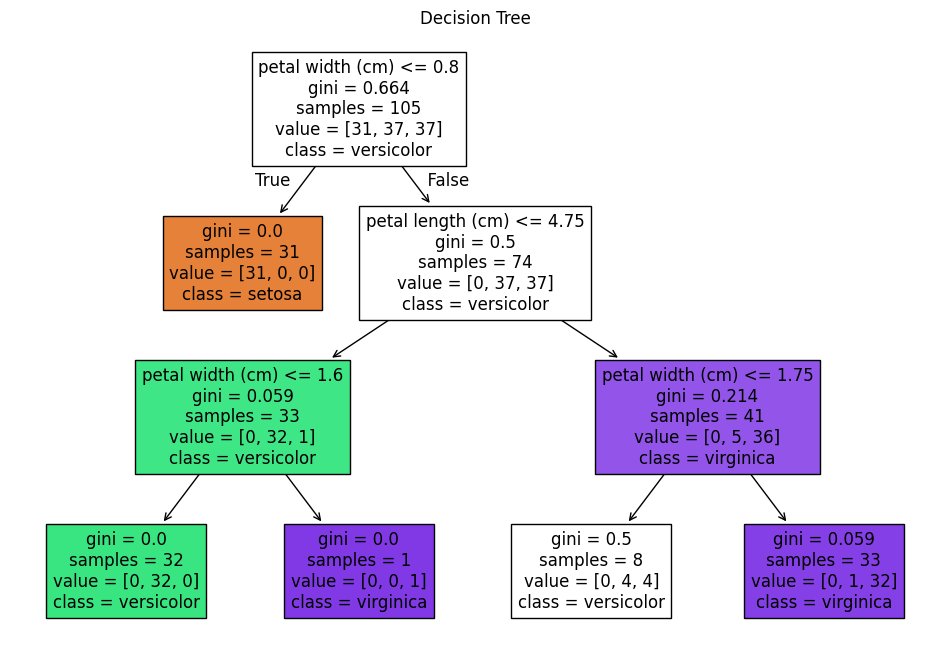

In [68]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

data = load_iris()
X = data.data
y = data.target

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the decision tree classifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# Train the classifier
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Evaluate accuracy
accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

# Visualize the decision tree
plt.figure(figsize=(12,8))
plot_tree(clf, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.title("Decision Tree")
plt.show()
